In [1]:
from granad import core, wrappers
import jax.numpy as jnp
import jax
import numpy as np
import matplotlib.pyplot as plt

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


## Plotting eigenenergies of graphene nanoflakes and hybrid systems

**Contents of this notebook:**   
Example 4.1. Energy spectrum of different flakes.\
Example 4.2. Shift of energy levels in a graphene nanoflake due to gradual coupling of an adatom.

----------------------------

First, we will create two identical flakes (flake_1 and flake_2) as described in tutorial 01.\
Next, we will attach an adatom to flake_1 as shown in tutorial 02.\
Last, we will plot the energy spectrum of both flakes to compare the flake without the adatom and with the adatom.

### Example 4.1. Example 4.1. Plotting energy spectrum of different flakes

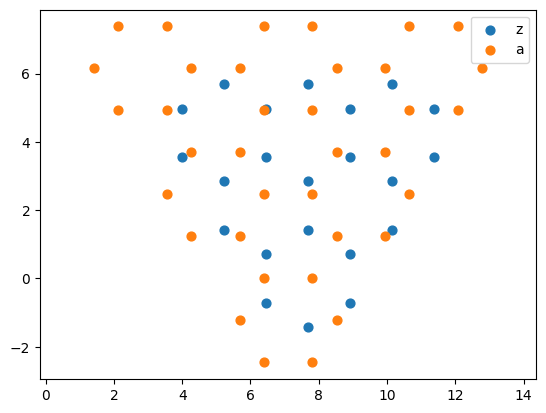

/home/julia/.local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:4411: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


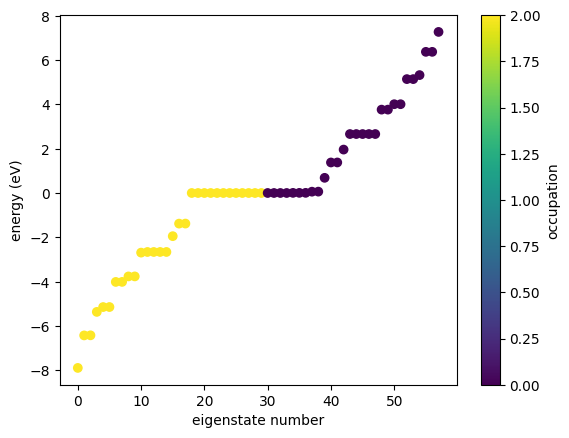

In [2]:
# pristine graphene flake
cc_distance = 2.46/np.sqrt(3)            
graphene_armchair_unit = wrappers.unit_cells['armchair'] * cc_distance
graphene_armchair_scale = wrappers.scales['armchair'] * cc_distance
orbs_a = core.get_orbitals(core.triangle(3), graphene_armchair_unit, graphene_armchair_scale, 'a', shift = jnp.array([0, 0, 4]))

graphene_zigzag_unit = wrappers.unit_cells['zigzag'] * cc_distance
graphene_zigzag_scale = wrappers.scales['zigzag'] * cc_distance
orbs_z = core.get_orbitals(core.triangle(3), graphene_zigzag_unit, graphene_zigzag_scale, 'z', shift = jnp.array([4, 0, 0]))

orbs = np.concatenate((orbs_a, orbs_z))

h_dict = {}
c_dict = {}
h_dict[('a', 'z')] = jax.jit(lambda d : 2.66 * (1 / d) ** 2 + 0.0j)
c_dict[('a', 'z')] = jax.jit(lambda d : 0j) 


orbs_in_uc = cc_distance * jnp.array(
    [
        [0, 0, 0],
        [1, 0, 0],
        [-1 / 2, -jnp.sqrt(3) / 2, 0],
        [-1 / 2, -jnp.sqrt(3) / 2, 0],
    ]
)
h_dict[('a', 'a')] = core.neighbour_coupling( graphene_armchair_unit, orbs_in_uc, [0, -2.66 + 0j])
c_dict[('a', 'a')] = core.neighbour_coupling( graphene_armchair_unit, orbs_in_uc, [16.522 + 0j, 8.64 + 0j, 5.333 + 0j], lambda r :  27.21*0.52918/r + 0j)
h_dict[('z', 'z')] = core.neighbour_coupling( graphene_zigzag_unit, orbs_in_uc, [0, -2.66 + 0j])
c_dict[('z', 'z')] = core.neighbour_coupling( graphene_zigzag_unit, orbs_in_uc, [16.522 + 0j, 8.64 + 0j, 5.333 + 0j], lambda r :  27.21*0.52918/r + 0j)
stack = core.get_stack( orbs, h_dict, c_dict, doping = 2 )

wrappers.show_eigenstate2D(stack, indicate_size = False, annotate_hilbert = False)
wrappers.show_energies(stack)

### Example 4.2. Shift of energy levels in a graphene nanoflake due to gradual coupling of an adatom


In [3]:
cc_distance = 2.46/np.sqrt(3)            
graphene_armchair_unit = wrappers.unit_cells['armchair'] * cc_distance
graphene_armchair_scale = wrappers.scales['armchair'] * cc_distance

orbs = core.get_orbitals(core.triangle(3), graphene_armchair_unit, graphene_armchair_scale, 'pz', shift = jnp.zeros(3))

h_dict = {}
c_dict = {}

orbs_in_uc = cc_distance * jnp.array(
    [
        [0, 0, 0],
        [1, 0, 0],
        [-1 / 2, -jnp.sqrt(3) / 2, 0],
        [-1 / 2, -jnp.sqrt(3) / 2, 0],
    ]
)

h_dict[('pz', 'pz')] = core.neighbour_coupling( graphene_armchair_unit, orbs_in_uc, [0, 0j])
c_dict[('pz', 'pz')] = core.neighbour_coupling( graphene_armchair_unit, orbs_in_uc, [0j, 0j])

stack = core.get_stack( orbs, h_dict, c_dict )

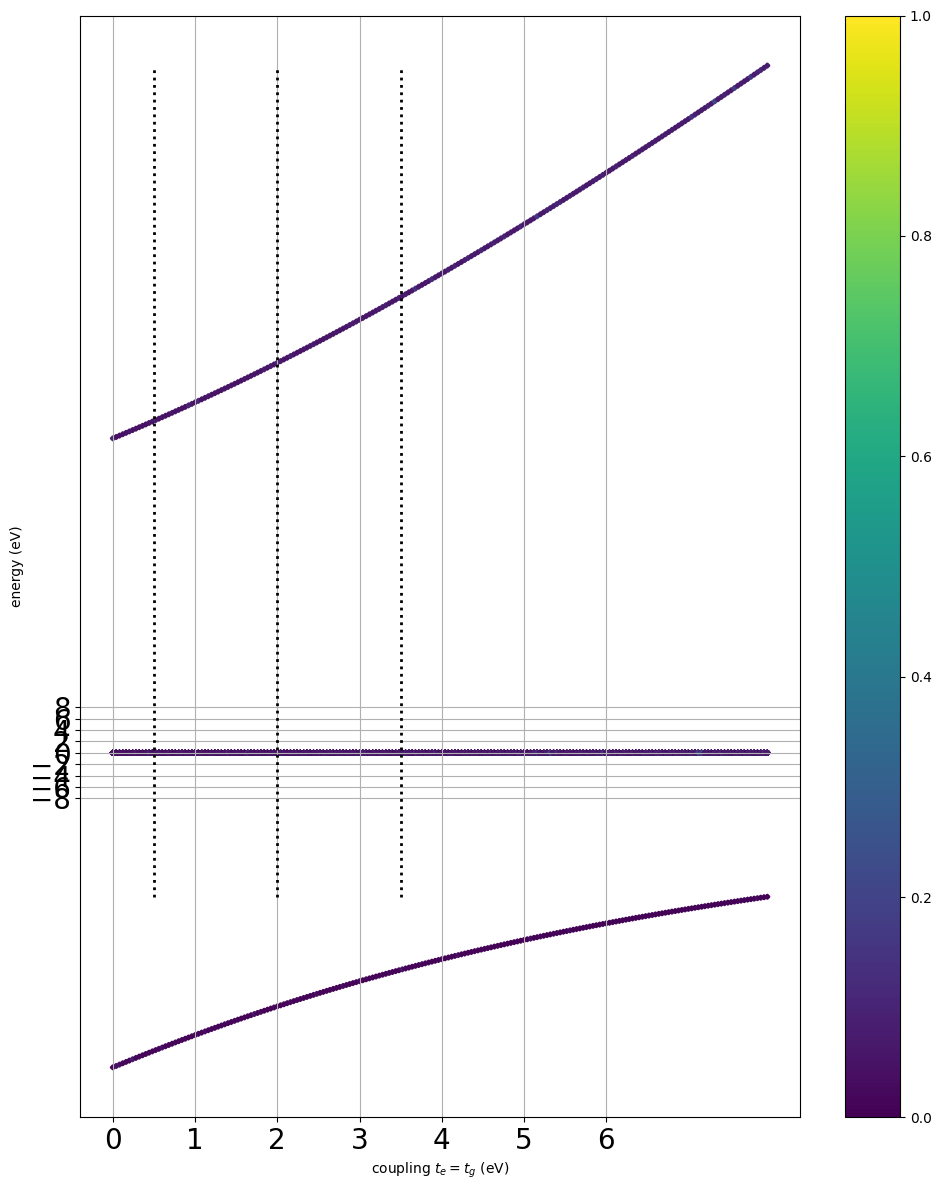

In [9]:
fig = plt.figure(figsize=[10, 12])
iter_range = 200
discr = 0.04
    
h_dict[('lower', 'lower')] = jax.jit(lambda d : 0.05 + 0j) 
h_dict[('upper', 'upper')] = jax.jit(lambda d : -1.5 + 0j) 

c_dict[('lower', 'lower')] = jax.jit(lambda d : 0j) 
c_dict[('upper', 'upper')] = jax.jit(lambda d : 0j)

h_dict[('upper', 'lower')] = jax.jit(lambda d : 0j) 
h_dict[('upper', 'pz')] = jax.jit(lambda d : 2.66 + 0.0j) 
h_dict[('lower', 'pz')] = jax.jit(lambda d : 2.66 + 0.0j) 
    
c_dict[('upper', 'lower')] = jax.jit(lambda d :0j)
c_dict[('upper', 'pz')] = jax.jit(lambda d : 2.66 + 0.0j) 
c_dict[('lower', 'pz')] = jax.jit(lambda d : 2.66 + 0.0j)

adatom_position = np.array([3, 7.5, 0])

orbs.append(core.Orbital(orbital_ident = 'upper', position = adatom_position))
orbs.append(core.Orbital(orbital_ident = 'lower', position = adatom_position))

stack = core.get_stack(orbs, h_dict, c_dict)

for ratio in range(iter_range):
   
    value = discr * ratio + 0.0j
    
    h_dict[('upper', 'lower')] = jax.jit(lambda d : value) 
    h_dict[('upper', 'upper')] = jax.jit(lambda d : value) 
    h_dict[('lower', 'lower')] = jax.jit(lambda d : value) 
    
    c_dict[('upper', 'lower')] = jax.jit(lambda d :value)
    c_dict[('upper', 'upper')] = jax.jit(lambda d : value) 
    c_dict[('lower', 'lower')] = jax.jit(lambda d : value) 

    flake = core.get_stack(orbs, h_dict, c_dict)

    adatom_contribution = np.zeros((len(flake.energies)))
    for i in range(len(flake.energies)):
        adatom_contribution[i] = np.abs(flake.eigenvectors[i][-2])**2 + np.abs(flake.eigenvectors[i][-1])**2

    data_to_plot = flake.energies
    plt.scatter([discr * ratio] * len(data_to_plot), data_to_plot, s = 3, marker='D', c = adatom_contribution, linewidths = 2, vmin=0, vmax=1)

plt.xticks([0,1,2,3,4,5,6])
plt.yticks([-8, -6, -4, -2, 0, 2, 4, 6, 8])
plt.tick_params(labelsize=20)
plt.vlines(0.5, np.min(data_to_plot), np.max(data_to_plot), linestyles = 'dotted', colors = 'k',linewidth = 2)
plt.vlines(2.0, np.min(data_to_plot), np.max(data_to_plot), linestyles = 'dotted', colors = 'k',linewidth = 2)
plt.vlines(3.5, np.min(data_to_plot), np.max(data_to_plot), linestyles = 'dotted', colors = 'k',linewidth = 2)

plt.xlabel('coupling $t_e=t_g$ (eV)')
plt.ylabel('energy (eV)')
plt.grid()
plt.colorbar()
plt.tight_layout()
plt.show()
plt.close(fig)